In [1]:
from fipy import Grid2D, CellVariable, TransientTerm, DiffusionTerm, ConvectionTerm, Viewer
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [62]:
def gaussian_two_peaks(x, y, A1, A2, mu1, mu2, sigma1, sigma2, nu1, nu2):
    term1 = A1 * np.exp(-((x - mu1)**2 + (y - nu1)**2) / (2 * sigma1**2))
    term2 = A2 * np.exp(-((x - mu2)**2 + (y - nu2)**2) / (2 * sigma2**2))
    return term1 + term2

# Definindo o modelo de elevação A(x, y)
def A(x, y):
    # Exemplo simples: uma elevação gaussiana
    center_x, center_y = 50, 50  # Ponto central (no meio da malha)
    sigma = 10  # Desvio padrão
    #return np.exp(-((x - center_x)**2 + (y - center_y)**2) / (2 * sigma**2))
    #return np.sin(x) * np.cos(y) + np.sin(2*x) * np.cos(2*y)
    return gaussian_two_peaks(x, y, 10, 30, 10, 60, 5, 9, 0, 50)

# Definindo o campo vetorial w(x, y) com base em A(x, y)
def w(x, y):
    A_val = A(x, y)  # Valor de A no ponto (x, y)
    return 1 / (1 + A_val)  # Campo vetorial w(x, y)

In [63]:
x = np.linspace(0, 100, 100)
y = np.linspace(0, 100, 100)

X, Y = np.meshgrid(x, y)

In [64]:
Z = A(X, Y)
W = w(X, Y)

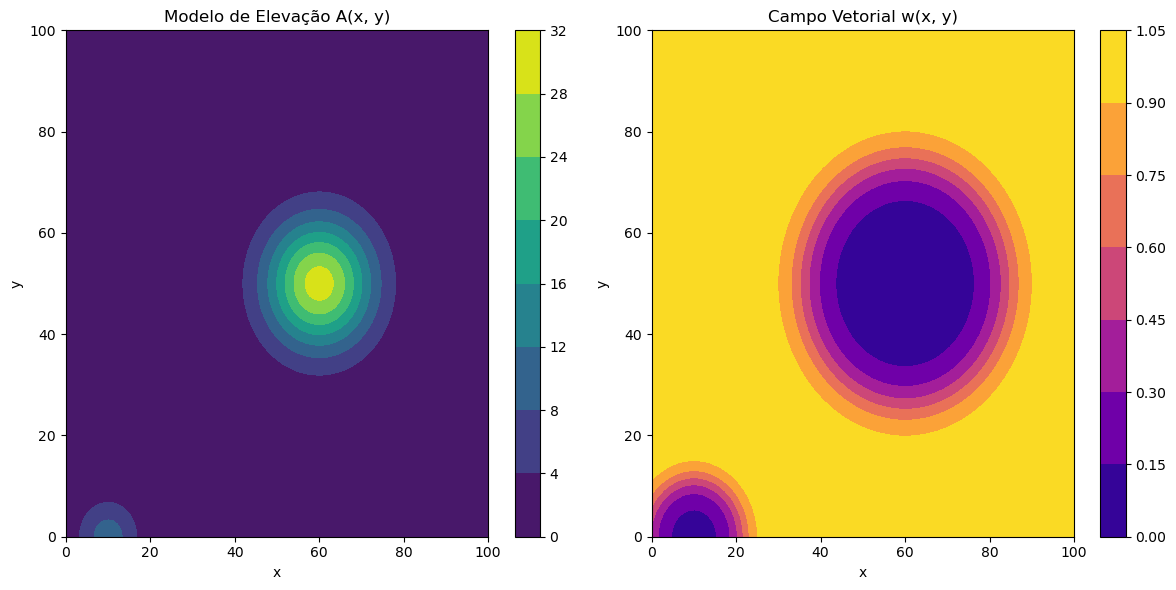

In [65]:
# Criando o gráfico
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plotando a elevação A(x, y)
ax[0].contourf(X, Y, Z, cmap='viridis')
ax[0].set_title('Modelo de Elevação A(x, y)')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
fig.colorbar(ax[0].contourf(X, Y, Z, cmap='viridis'), ax=ax[0])

# Plotando o campo vetorial w(x, y)
ax[1].contourf(X, Y, W, cmap='plasma')
ax[1].set_title('Campo Vetorial w(x, y)')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
fig.colorbar(ax[1].contourf(X, Y, W, cmap='plasma'), ax=ax[1])

plt.tight_layout()
plt.show()

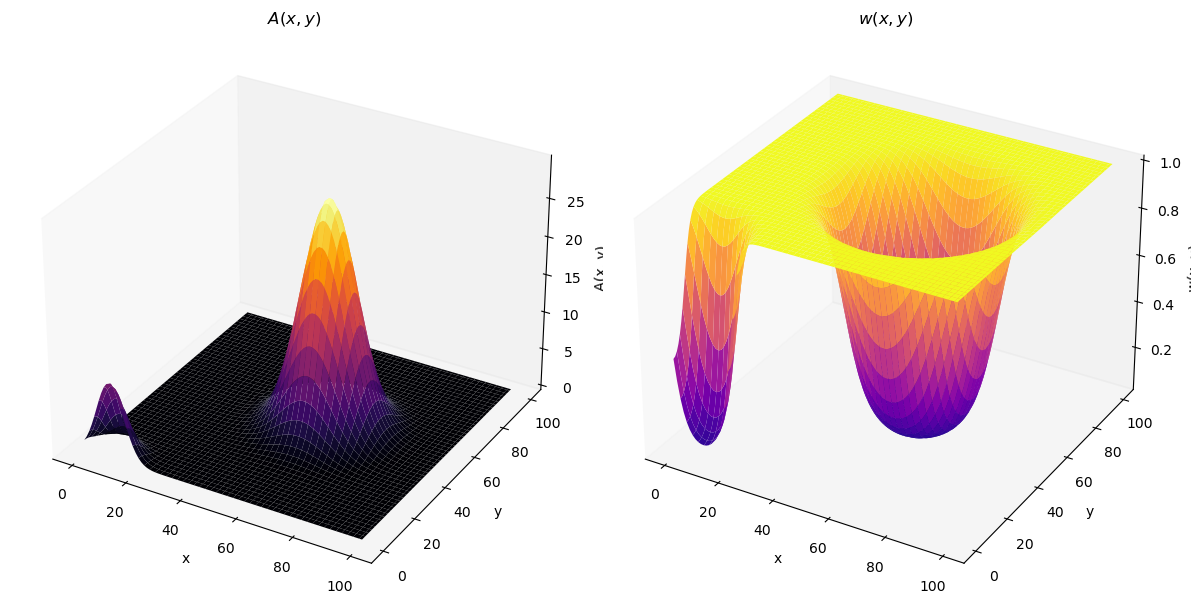

In [70]:
# Criando o gráfico 3D para a elevação A(x, y)
fig = plt.figure(figsize=(12, 6))

# Subplot 1: Elevação A(x, y)
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='inferno')
ax1.set_title(r'$A(x, y)$')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('A(x, y)')
ax1.grid(False)  # Desativa o grid

# Subplot 2: Campo Vetorial w(x, y)
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, W, cmap='plasma')
ax2.set_title(r'$w(x, y)$')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('w(x, y)')
ax2.grid(False)  # Desativa o grid

plt.tight_layout()

plt.savefig('superficie_queimada.png')
plt.show()
